# Logistic Regression with Scikit Learn - Machine Learning with Python


The following topics are covered in this tutorial:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set
- Saving a model to disk and loading it back


## Problem Statement
We'll learn how to apply _logistic regression_ to a real-world dataset from Kaggle

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


## Linear Regression vs. Logistic Regression

In this lesson, we'll use _logistic regression_, which is better suited for _classification_ problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a _classfication_ or _regression_ problem is an important first step in machine learning.


### Classification Problems


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_. 

Here are some examples of classification problems:

- [Rainfall prediction](https://kaggle.com/jsphyg/weather-dataset-rattle-package): Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")
- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.

Can you think of some more classification problems?


### Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as _regression problems_.

Here are some example of regression problems:

- [Medical Charges Prediction](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
- [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 
- [Ocean Temperature Prediction](https://www.kaggle.com/sohier/calcofi)
- [Weather Temperature Prediction](https://www.kaggle.com/budincsevity/szeged-weather)

Can you think of some more regression problems?


### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

In [1]:
#!pip install scikit-learn --upgrade --quiet

## Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [2]:
#!pip install opendatasets --upgrade --quiet

In [3]:
#import opendatasets as od

In [4]:
#od.version()

The dataset can now be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [5]:
#dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [6]:
#od.download(dataset_url)

Once the above command is executed, the dataset is downloaded and extracted to the the directory `weather-dataset-rattle-package`.

In [7]:
#import os

In [8]:
#data_dir = './weather-dataset-rattle-package'

In [9]:
#os.listdir(data_dir)

In [10]:
#pd.read_csv('xclara.csv')

In [11]:
#train_csv = data_dir + '/weatherAUS.csv'


Let's load the data from `weatherAUS.csv` using Pandas.

In [12]:
#!pip install pandas --quiet

In [13]:
import pandas as pd

In [14]:
#raw_df = pd.read_csv(train_csv)
raw_df= pd.read_csv('/content/weatherAUS.csv')

In [15]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`.

Let's check the data types and missing values in the various columns.

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of `RainTomorrow` or `RainToday` is missing to make our analysis and modeling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable). 

In [17]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

How would you deal with the missing values in the other columns?


In [18]:
!pip install plotly matplotlib seaborn --quiet

In [19]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
#looking for unique locations
raw_df.Location.nunique()

49

In [21]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [22]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [23]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [24]:
use_sample = False

In [25]:
sample_fraction = 0.1

In [26]:
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [27]:
!pip install scikit-learn --upgrade --quiet

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [30]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

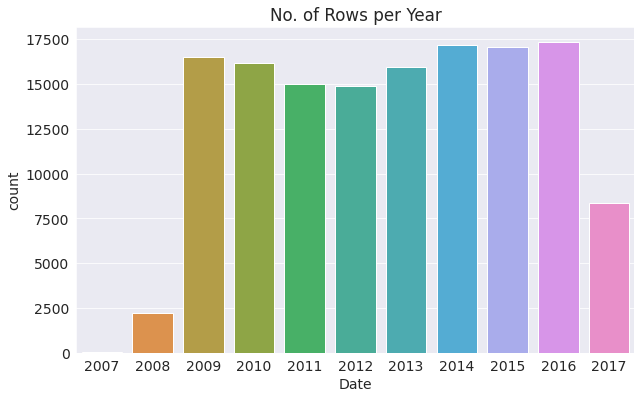

In [31]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [32]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [33]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [34]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [35]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [36]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [37]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [38]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [39]:
target_col

'RainTomorrow'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [40]:
#remaining part

#creating a copy because we will start modyfying the data
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [41]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [42]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [43]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [44]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [45]:
!pip install numpy --quiet

In [46]:
import numpy as np

In [47]:
#idetifying the numerical and categorical columns for preprocessing
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [48]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [49]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Let's view some statistics for the numeric columns.

In [50]:
train_inputs[categorical_cols].describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,97988,91120,90969,96036,97988
unique,49,16,16,16,2
top,Canberra,W,N,SE,No
freq,2506,6672,8012,7603,76002


Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [51]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer = SimpleImputer(strategy = 'mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [54]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for `train_inputs`, `val_inputs` and `test_inputs`.

In [55]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [56]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [57]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [58]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [59]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [60]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [61]:
#Day2: Logistic Regression

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [62]:
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
?MinMaxScaler

In [65]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [66]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [67]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [68]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [69]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range $(0,1)$

In [70]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


## Encoding Categorical Data

Since these categorical features cannot be directly used in most machine learning algorithms, the categorical features need to be transformed into numerical features. While numerous techniques exist to transform these features, the most common technique is one-hot encoding.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [71]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [74]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [75]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [76]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

The encoder has created a list of categories for each of the categorical columns in the dataset. 

We can generate column names for each individual category using `get_feature_names`.

In [77]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [78]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073,No
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058,No
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944,No
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284,No
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.298851,0.22,0.13,0.555372,0.5232,0.492351,0.499917,0.651899,0.714012,No
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.229885,0.16,0.08,0.530579,0.4880,0.492351,0.499917,0.761603,0.771593,No
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.103448,0.15,0.08,0.519008,0.4944,0.492351,0.499917,0.778481,0.788868,No
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.195402,0.22,0.09,0.553719,0.5136,0.492351,0.499917,0.780591,0.817658,No


All of the above columns will be added to `train_inputs`, `val_inputs` and `test_inputs`.

To perform the encoding, we use the `transform` method of `encoder`.

In [79]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented 

We can verify that these new columns have been added to our training, test and validation sets.

In [80]:
#pd.set_option('display.max_columns', None)

In [81]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037741,0.526244,ENE,0.372093,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037741,0.526244,SSE,0.341085,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037741,0.526244,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037741,0.526244,SSE,0.255814,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037741,0.526244,ENE,0.193798,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037741,0.526244,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037741,0.526244,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037741,0.526244,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037741,0.526244,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [82]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [83]:
!pip install pyarrow --quiet

In [84]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [85]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 33.3 ms, sys: 2.11 ms, total: 35.4 ms
Wall time: 35.5 ms


We can read the data back using `pd.read_parquet`.

In [86]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 251 ms, sys: 196 ms, total: 447 ms
Wall time: 310 ms


Let's verify that the data was loaded properly.

In [87]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [88]:
val_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2133,Albury,0.469340,0.724008,0.0,0.037741,0.526244,WSW,0.186047,ESE,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2134,Albury,0.566038,0.839319,0.0,0.037741,0.526244,NE,0.387597,ESE,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2135,Albury,0.603774,0.814745,0.0,0.037741,0.526244,NNE,0.325581,NE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2136,Albury,0.813679,0.716446,0.0,0.037741,0.526244,NNE,0.271318,ESE,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2137,Albury,0.648585,0.756144,0.0,0.037741,0.526244,E,0.209302,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,0.683962,0.746692,0.0,0.037741,0.526244,E,0.356589,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144914,Uluru,0.625000,0.778828,0.0,0.037741,0.526244,ESE,0.372093,E,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144915,Uluru,0.613208,0.792060,0.0,0.037741,0.526244,E,0.387597,E,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144916,Uluru,0.672170,0.826087,0.0,0.037741,0.526244,E,0.410853,E,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
?LogisticRegression

In [92]:
model = LogisticRegression(solver='liblinear')

We can train the model using `model.fit`.

In [93]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


Let's check the weights and biases of the trained model.

In [94]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [95]:
print(model.coef_.tolist())

[[0.8986297930345342, -2.8799204060649943, 3.1627757399992764, 0.8542333261963998, -1.671394164561986, 6.764390158247094, -0.9423158858733789, -1.4284258683428768, 0.3228997608393862, 5.995318372268631, 5.463846784453185, -9.17679795785107, -0.16230333435253397, 1.2876575040619256, 0.4747186064170006, 2.0214328984948513, 0.6016519028215679, -0.552477104469191, 0.47814423119684174, 0.0076658073824705615, 0.34681523049757107, -0.35227929992271934, 0.17971215004683533, 0.44048763345826203, -0.01398015208073661, 0.028943135225948075, 0.2581472778649235, -0.021207662838966575, -0.042792369348315706, -0.48314018877133696, -0.13756446769655933, -0.5760632042270655, -0.7875166742656966, -0.255401526390966, -0.32888762445550657, -0.5690081830628351, 0.08182990879409187, 0.01338244162954458, 0.06412637314153144, -0.9020547728556427, -0.44432692411493857, 0.008520520479860539, -0.4606123201969221, -0.46551901921036964, -0.06950134886943393, 0.1911583743352608, 0.45047746322189247, 0.6081203012953

In [96]:
n = len(model.coef_.tolist())

weight_df =  pd.DataFrame({
    'feature' : (numeric_cols + encoded_cols),
    'weight' :model.coef_.tolist()[0]
})
weight_df

,feature,weight
0,MinTemp,0.898630
1,MaxTemp,-2.879920
2,Rainfall,3.162776
3,Evaporation,0.854233
4,Sunshine,-1.671394
...,...,...
113,WindDir3pm_WNW,-0.033499
114,WindDir3pm_WSW,-0.275977
115,WindDir3pm_nan,0.074933
116,RainToday_No,-1.473518


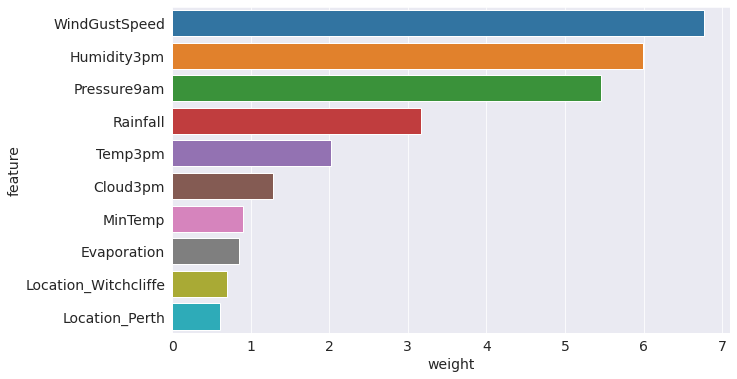

In [97]:
sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x = 'weight', y = 'feature')

Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [98]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [99]:
#making predictions
train_preds = model.predict(X_train)

In [100]:
#this is what our model has predicted, almost 20% of the data was showing that there will be rainfall
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [101]:
#our expected outcome
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

We can output a probabilistic prediction using `predict_proba`.

In [102]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94401112, 0.05598888],
       [0.94074168, 0.05925832],
       [0.96093614, 0.03906386],
       ...,
       [0.98749119, 0.01250881],
       [0.98334685, 0.01665315],
       [0.87453486, 0.12546514]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [103]:
model.classes_

array(['No', 'Yes'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

Accuracy is a metric used in classification problems used to tell the percentage of accurate predictions. We calculate it by dividing the number of correct predictions by the total number of predictions

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(train_targets, train_preds)

0.8519206433440829

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [108]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


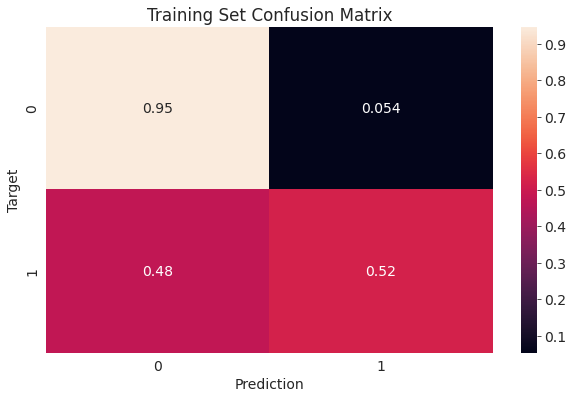

In [137]:
train_preds = predict_and_plot(X_train, train_targets, 'Training Set')

Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 85.40%


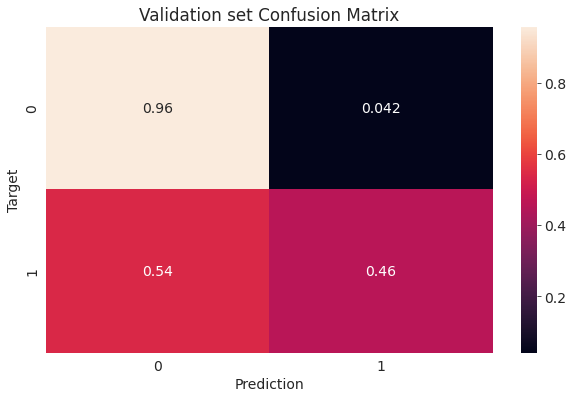

In [136]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation set' )

Accuracy: 84.20%


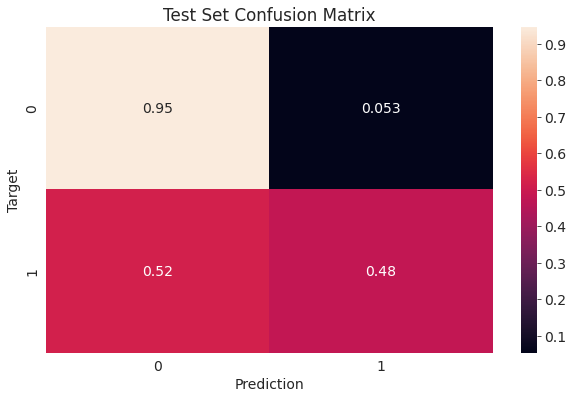

In [138]:
test_preds = predict_and_plot(X_test, test_targets, 'Test Set')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [139]:
#created a random model 
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [140]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [142]:
random_guess(X_val)

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'No', 'No'], dtype='<U3')

In [145]:
all_no(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

Let's check the accuracies of these two models on the test set.

In [146]:
#computing accuracy using random guess model
accuracy_score(test_targets, random_guess(X_test))

0.5017113963438351

In [115]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%. 

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department.

In [182]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 10.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`. This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [183]:
new_input_df = pd.DataFrame([new_input])

In [184]:
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,10.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


We've now created a Pandas dataframe with the same columns as `raw_df` (except `RainTomorrow`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Imputation of missing values using the `imputer` created earlier
2. Scaling numerical features using the `scaler` created earlier
3. Encoding categorical features using the `encoder` created earlier

In [185]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [186]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.747642,0.718336,0.027493,0.028966,0.526244,0.031008,0.1,0.229885,0.89,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We can now make a prediction using `model.predict`.

In [187]:
prediction = model.predict(X_new_input)[0]

In [188]:
prediction

'No'

Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

In [189]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.8934446, 0.1065554])

Looks like our model isn't too confident about its prediction!

Let's define a helper function to make predictions for individual inputs.

In [157]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

We can now use this function to make predictions for individual inputs.

In [197]:
new_input = {'Date': '2021-06-19',
             'Location': 'Albury',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [198]:
predict_input(new_input)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



('Yes', 0.7927531356674008)

In [192]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)